In [2]:
import os
import pydicom
import numpy as np
import pandas as pd

In [1]:
import os
import pydicom
import numpy as np
import pandas as pd

def converToHU(path):
    """Преобразует изображение DICOM в единицы Хаунсфилда."""
    dicom = pydicom.dcmread(path) 
    pixel_array = dicom.pixel_array.astype(float)
    rescale_slope = dicom.RescaleSlope
    rescale_intercept = dicom.RescaleIntercept
    hu_array = pixel_array * rescale_slope + rescale_intercept
    return hu_array

def collect_healthy_data(folder_path):
    """Собирает данные о здоровых снимках DICOM и сохраняет их в DataFrame."""
    # Создаем пустой DataFrame для хранения данных
    healthy_data = pd.DataFrame(columns=['hu_array'])
    
    # Рекурсивно обходим все папки и подпапки в указанной директории
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            try:
                # Получаем полный путь к файлу
                path = os.path.join(root, file)
                
                # Обрабатываем файл DICOM и получаем массив Хаунсфилда
                hu_array = converToHU(path)
                
                # Проверяем, есть ли на срезе плечи или зубы
                # Мы можем использовать некоторые эвристики для этой проверки, 
                # например, учитывать наличие определенных значений пикселей или структур
                # Это может потребовать дополнительного исследования и тестирования
                # Для примера, давайте просто пропустим срез, если он находится в определенном диапазоне номеров срезов
                
                slice_number = int(pydicom.dcmread(path).InstanceNumber)
                if slice_number >= 100 and slice_number <= 150:
                    #print(slice_number, ' add')
                    healthy_data = healthy_data.append({'hu_array': hu_array}, ignore_index=True)                 
                #else:
                #    print(slice_number, ' drop')
                    
            except Exception as e:
                continue
    
    # Возвращаем DataFrame с данными
    return healthy_data

# Путь к папке с изображениями DICOM здоровых снимков
folder_path = "testing/Lung-Rads_1/"

# Собираем данные о здоровых снимках DICOM и сохраняем их в DataFrame
healthy_data_df = collect_healthy_data(folder_path)

# Выводим первые несколько строк DataFrame для проверки
print(healthy_data_df.head())


                                            hu_array
0  [[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,...
1  [[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,...
2  [[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,...
3  [[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,...
4  [[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,...


In [2]:
import matplotlib.pyplot as plt

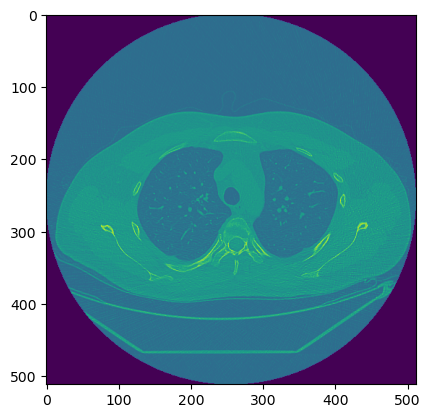

In [3]:
plt.imshow(healthy_data_df['hu_array'][800])

In [4]:
healthy_data_df

,hu_array
0,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
1,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
2,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
3,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
4,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
...,...
884,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
885,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
886,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
887,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."


In [5]:
import pickle

In [7]:
healthy_data_df = pd.read_pickle('health.pkl')

In [8]:
df

,hu_array
0,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
1,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
2,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
3,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
4,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
...,...
884,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
885,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
886,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."
887,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,..."


In [11]:
def find_pix_dim(ct_img):
    """
    Get the pixdim of the CT image.
    A general solution that gets the pixdim indicated from the image dimensions. From the last 2 image dimensions, we get their pixel dimension.
    Args:
        ct_img: nib image

    Returns: List of the 2 pixel dimensions
    """
    #pix_dim = ct_img.header["pixdim"] # example [1,2,1.5,1,1]
    #dim = ct_img.header["dim"] # example [1,512,512,1,1]
    #max_indx = np.argmax(dim)
    #pixdimX = pix_dim[max_indx]
    #dim = np.delete(dim, max_indx)
    #pix_dim = np.delete(pix_dim, max_indx)
    #max_indy = np.argmax(dim)
    #pixdimY = pix_dim[max_indy]
    return [1, 1]
def make_dirs(path):
    """
    Creates the directory as specified from the path
    in case it exists it deletes it
    """
    if os.path.exists(path):
        shutil.rmtree(path)
        os.mkdir(path)
    else:
        os.makedirs(path)

def intensity_seg(ct_numpy, min, max):
    clipped = ct_numpy.clip(min, max)
    clipped[clipped != max] = 1
    clipped[clipped == max] = 0
    return measure.find_contours(clipped, 0.95)

def set_is_closed(contour):
    if contour_distance(contour) < 1:
        return True
    else:
        return False

def find_lungs(contours):
    """
    Chooses the contours that correspond to the lungs and the body
    FIrst we exclude non closed sets-contours
    Then we assume some min area and volume to exclude small contours
    Then the body is excluded as the highest volume closed set
    The remaining areas correspond to the lungs

    Args:
        contours: all the detected contours

    Returns: contours that correspond to the lung area

    """
    body_and_lung_contours = []
    vol_contours = []

    for contour in contours:
        hull = ConvexHull(contour)

        if hull.volume > 2000 and set_is_closed(contour):
            body_and_lung_contours.append(contour)
            vol_contours.append(hull.volume)

    if len(body_and_lung_contours) == 2:
        return body_and_lung_contours
    elif len(body_and_lung_contours) > 2:
        vol_contours, body_and_lung_contours = (list(t) for t in
                                                zip(*sorted(zip(vol_contours, body_and_lung_contours))))
        body_and_lung_contours.pop(-1)
        return body_and_lung_contours


#def show_contour(image, contours, name=None, save=False):
#    fig, ax = plt.subplots()
    #ax.imshow(image.T, cmap=plt.cm.gray)
    #for contour in contours:
    #    ax.plot(contour[:, 0], contour[:, 1], linewidth=1)

    #ax.set_xticks([])
    #ax.set_yticks([])

    #if save:
    #    plt.savefig(name)
    #    plt.close(fig)
    #else:
    #    plt.show()



def create_mask_from_polygon(image, contours):
    """
    Creates a binary mask with the dimensions of the image and
    converts the list of polygon-contours to binary masks and merges them together
    Args:
        image: the image that the contours refer to
        contours: list of contours

    Returns:

    """

    lung_mask = np.array(Image.new('L', image.shape, 0))
    for contour in contours:
        x = contour[:, 0]
        y = contour[:, 1]
        polygon_tuple = list(zip(x, y))
        img = Image.new('L', image.shape, 0)
        ImageDraw.Draw(img).polygon(polygon_tuple, outline=0, fill=1)
        mask = np.array(img)
        lung_mask += mask

    lung_mask[lung_mask > 1] = 1  # sanity check to make 100% sure that the mask is binary

    return lung_mask.T  # transpose it to be aligned with the image dims

def save_nifty(img_np, name, affine):
    """
    binary masks should be converted to 255 so it can be displayed in a nii viewer
    we pass the affine of the initial image to make sure it exits in the same
    image coordinate space
    Args:
        img_np: the binary mask
        name: output name
        affine: 4x4 np array
    Returns:
    """
    img_np[img_np == 1] = 255
    ni_img = nib.Nifti1Image(img_np, affine)
    nib.save(ni_img, name + '.nii.gz')


def find_pix_dim(ct_img):
    """
    Get the pixdim of the CT image.
    A general solution that get the pixdim indicated from the image
    dimensions. From the last 2 image dimensions we get their pixel dimension.
    Args:
        ct_img: nib image

    Returns: List of the 2 pixel dimensions
    """
    return [1,1]

def contour_distance(contour):
    """
    Given a set of points that may describe a contour
     it calculates the distance between the first and the last point
     to infer if the set is closed.
    Args:
        contour: np array of x and y points

    Returns: euclidean distance of first and last point
    """
    dx = contour[0, 1] - contour[-1, 1]
    dy = contour[0, 0] - contour[-1, 0]
    return np.sqrt(np.power(dx, 2) + np.power(dy, 2))

def compute_area(mask, pixdim):
    """
    Computes the area (number of pixels) of a binary mask and multiplies the pixels
    with the pixel dimension of the acquired CT image
    Args:
        lung_mask: binary lung mask
        pixdim: list or tuple with two values

    Returns: the lung area in mm^2
    """
    mask[mask >= 1] = 1
    lung_pixels = np.sum(mask)
    return lung_pixels * pixdim[0] * pixdim[1]

In [12]:
healthy_data_df['hu_array_old'] = healthy_data_df['hu_array']

In [13]:
from scipy.spatial import ConvexHull
from skimage import measure
from PIL import Image, ImageDraw
import copy
import random
import copy
from scipy import ndimage

In [14]:
def create_vessel_mask(lung_mask, ct_numpy, denoise=False):
    vessels = lung_mask * ct_numpy  # isolate lung area
    vessels[vessels == 0] = -1000
    #vessels[vessels >= -500] = 1
    #vessels[vessels < -500] = 0
    vessels[vessels >= 150] = -1000
    vessels[vessels >= -100] = 1
    vessels[vessels < -100] = 0  
    return vessels 

In [15]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Создаем массив 16x16, заполненный единицами
# array = np.zeros((64, 64))

# # Определяем центр круга и его радиус
# center = (32, 32)  # центр круга в координатах (x, y)
# radius = 30       # радиус круга

# # Создаем сетку точек для определения расстояния от каждой точки до центра круга
# x, y = np.meshgrid(np.arange(64), np.arange(64))

# # Вычисляем расстояние от каждой точки сетки до центра круга
# distance_from_center = np.sqrt((x - center[0])**2 + (y - center[1])**2)

# # Наложение круга на массив: если расстояние от точки до центра меньше радиуса, делаем значение равным 0
# array[distance_from_center <= radius] = 1

# # Визуализация массива с кругом
# plt.imshow(array, cmap='gray', interpolation='nearest')
# plt.colorbar()
# plt.show()


In [16]:
# mask = (array > np.mean(array))**2

In [17]:
# plt.imshow(mask)

In [16]:
import copy
df_new = copy.deepcopy(healthy_data_df)

In [18]:
def conv2d_fast(img, krn):
    is0, is1, ks0, ks1 = *img.shape, *krn.shape
    rs0, rs1 = is0 - ks0 + 1, is1 - ks1 + 1
    
    ix0 = np.arange(ks0)[:, None] + np.arange(rs0)[None, :]
    ix1 = np.arange(ks1)[:, None] + np.arange(rs1)[None, :]
    
    res = krn[:, None, :, None] * img[(ix0.ravel()[:, None], ix1.ravel()[None, :])].reshape(ks0, rs0, ks1, rs1)
    res = res.transpose(1, 3, 0, 2).reshape(rs0, rs1, -1).sum(axis = -1)
    
    return res

In [19]:
def cancer_addind(ct_numpy, generated_cancer):
        scale = np.random.randint(1, 5)
        generated_cancer = resize(generated_cancer, (64 // scale, 64 // scale))
        generated_cancer = (generated_cancer <= (np.mean(generated_cancer) * generated_cancer))
        contours = intensity_seg(ct_numpy, min=-1000, max=-300)
        lungs = find_lungs(contours)
        lung_mask = create_mask_from_polygon(ct_numpy, lungs)
        vessels = create_vessel_mask(lung_mask, ct_numpy)
        lung_mask_negative = (lung_mask == 0)**2
        vessels = vessels + lung_mask_negative
        img = ((lung_mask == 0) + vessels) > 0
        res = conv2d_fast(img, generated_cancer)
        out = (res == 0)
        if np.sum(out) == 0:
            out = (res == 0)
        else: 
            out[:,int(img.shape[0]):] = 0
        pos = np.where(out > 0)
        #print(pos)
        
        #ind = np.argsort(pos[1])[len(pos[1])//2]
        #ind = (pos[0][ind], pos[1][ind])
        # Выбираем случайный индекс
        ind = np.random.randint(1, len(pos[0]))
        ind = (pos[0][ind], pos[1][ind])
        # Проверяем, что значение в первой строке меньше 400
        while ind[0] >= 350:
            ind = (pos[0][ind], pos[1][ind]) 
        #print(ind)
        zero = np.zeros([512,512])
        zero[ind[0]:ind[0] +generated_cancer.shape[0],ind[1]:ind[1] + generated_cancer.shape[1]] = generated_cancer
        ct_numpyNew = copy.deepcopy(ct_numpy)
        zero = (zero != 0)
        plt.imshow(zero)
        newCancer = np.where(zero)
        
        oldCancer = np.where(generated_cancer)
        if (oldCancer[0][0] < 350):
            for i in range(len(newCancer[0])):
                if (generated_cancer[oldCancer[0][i],oldCancer[1][i]]!=0):
                    ct_numpyNew[newCancer[0][i],newCancer[1][i]] = generated_cancer[oldCancer[0][i],oldCancer[1][i]]
            return ct_numpyNew, zero

In [9]:
cancer = pd.read_pickle('df_generated_cencer_by_gan.pkl')
cancer.head()

,generated_images
0,"[[0.99957716, 0.99994725, 0.999998, 0.9998689,..."
1,"[[0.99886376, 0.9998478, 0.9999916, 0.999729, ..."
2,"[[0.9985019, 0.9997156, 0.9999755, 0.9991824, ..."
3,"[[0.9995942, 0.9999554, 0.9999976, 0.99989456,..."
4,"[[0.9996633, 0.9999727, 0.99999917, 0.9999101,..."


In [20]:
import matplotlib.pyplot as plt

def plot_images(images, rows=8, cols=8, figsize=(10, 10)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')
        ax.set_aspect('auto')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(i < cols)
        ax.spines['right'].set_visible(i < cols)
        ax.spines['bottom'].set_visible(i >= cols * (rows - 1))
        ax.spines['left'].set_visible(i % cols == 0)
    plt.tight_layout()
    plt.show()

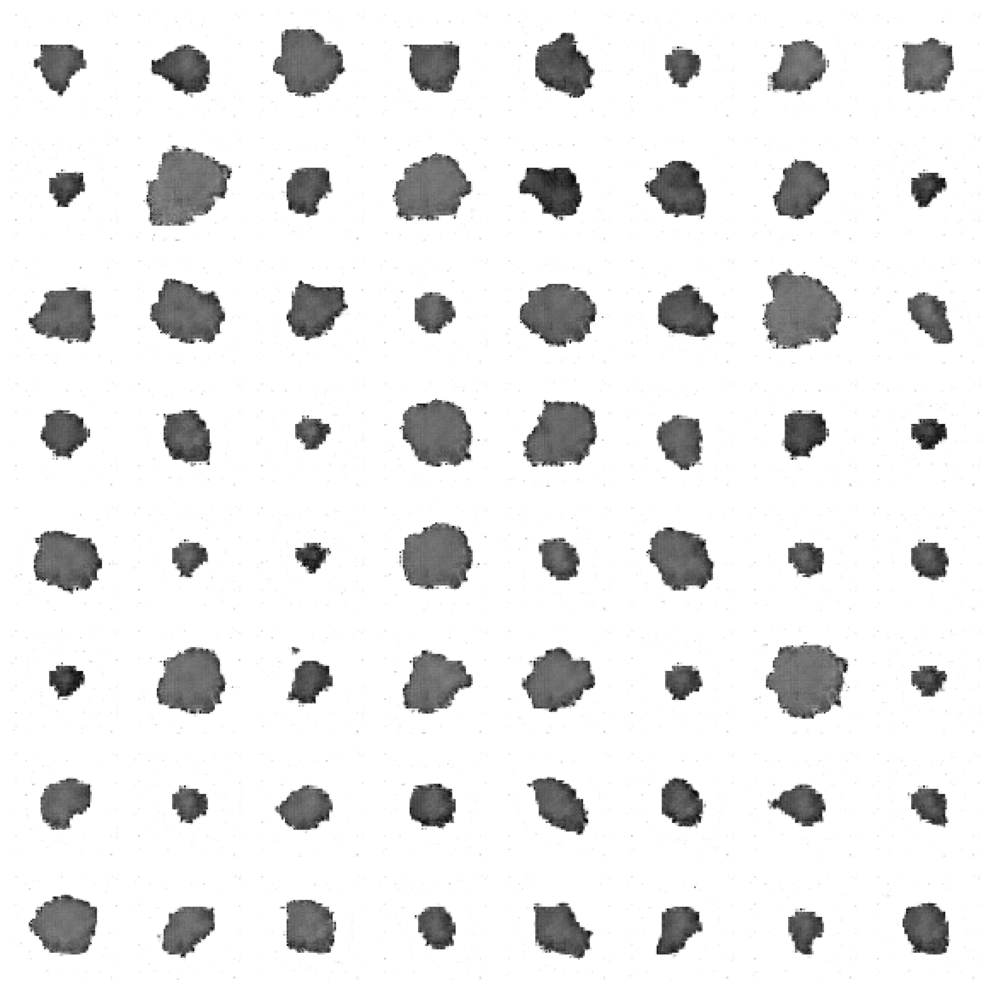

In [4]:
# Generated
plot_images(cancer['generated_images'].values, rows=8, cols=8)

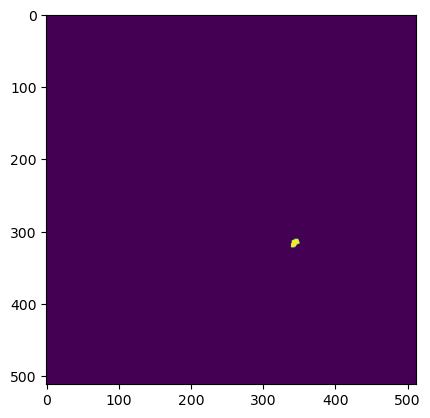

In [21]:
from skimage.transform import resize
ct_numpy = healthy_data_df['hu_array'][110]
generated_cancer = cancer['generated_images'][110]
new_ct, new_cancer = cancer_addind(ct_numpy, generated_cancer)

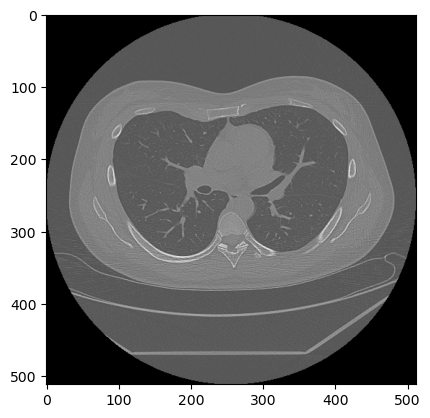

In [26]:
plt.imshow(ct_numpy, cmap = "gray")

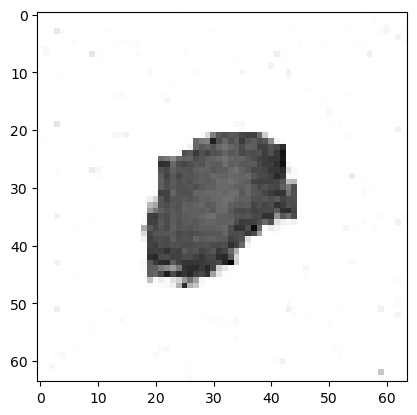

In [23]:
plt.imshow(generated_cancer,cmap="gray")

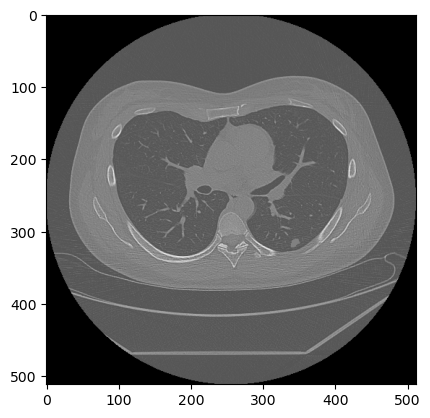

In [27]:
plt.imshow(new_ct, cmap = "gray")

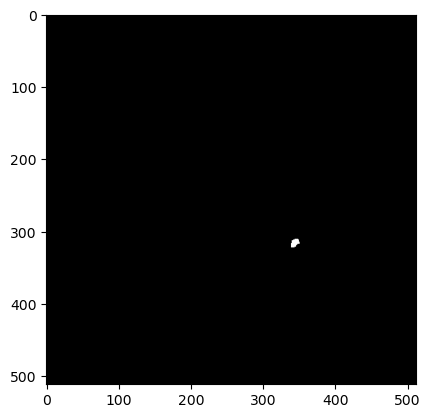

In [28]:
plt.imshow(new_cancer, cmap = "gray")

In [24]:
cancer

,generated_images
0,"[[0.99957716, 0.99994725, 0.999998, 0.9998689,..."
1,"[[0.99886376, 0.9998478, 0.9999916, 0.999729, ..."
2,"[[0.9985019, 0.9997156, 0.9999755, 0.9991824, ..."
3,"[[0.9995942, 0.9999554, 0.9999976, 0.99989456,..."
4,"[[0.9996633, 0.9999727, 0.99999917, 0.9999101,..."
...,...
891,"[[0.9986551, 0.99971104, 0.99997383, 0.9991998..."
892,"[[0.9993736, 0.9999289, 0.9999955, 0.9998073, ..."
893,"[[0.9997186, 0.9999795, 0.9999991, 0.99993104,..."
894,"[[0.9997942, 0.9999834, 0.9999991, 0.9999277, ..."


In [25]:
#cancer = (cancer['generated_images'][0] <= np.mean(cancer['generated_images'][0])) * cancer['generated_images'][0]
#plt.imshow(cancer)

100%|██████████| 800/800 [26:46<00:00,  2.01s/it]


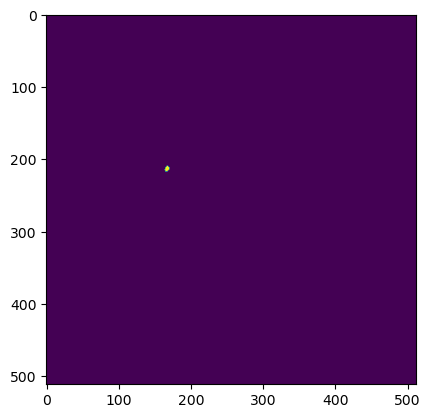

In [26]:
from tqdm import tqdm
generated_ct = []
generated_mask = []
err = 0
for i in tqdm(range(800)):
    try:
        img = healthy_data_df['hu_array'][i]
        mask = cancer['generated_images'][i]
        new_img, new_mask = cancer_addind(img,mask)
        generated_ct.append(new_img)
        generated_mask.append(new_mask)
    except:        
        err = err + 1
        

In [27]:
err

87

In [28]:
len(generated_ct)

713

In [29]:
len(generated_mask)

713

In [30]:
df_combined = pd.DataFrame(columns=['ct_image', 'cancer_mask'])
df_combined['ct_image'] = generated_ct
df_combined['cancer_mask'] = generated_mask

In [31]:
df_combined

,ct_image,cancer_mask
0,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,...","[[False, False, False, False, False, False, Fa..."
1,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,...","[[False, False, False, False, False, False, Fa..."
2,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,...","[[False, False, False, False, False, False, Fa..."
3,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,...","[[False, False, False, False, False, False, Fa..."
4,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,...","[[False, False, False, False, False, False, Fa..."
...,...,...
708,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,...","[[False, False, False, False, False, False, Fa..."
709,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,...","[[False, False, False, False, False, False, Fa..."
710,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,...","[[False, False, False, False, False, False, Fa..."
711,"[[-3024.0, -3024.0, -3024.0, -3024.0, -3024.0,...","[[False, False, False, False, False, False, Fa..."


In [32]:
df_combined.to_pickle("df_gan_full.pkl")

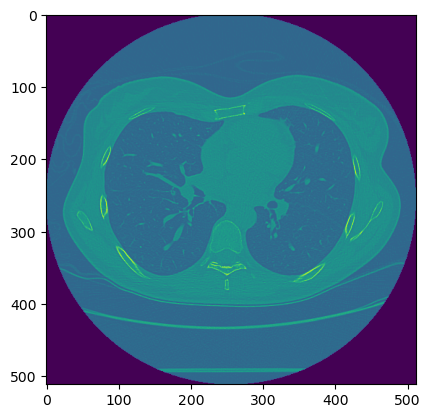

In [33]:
plt.imshow(generated_ct[100])

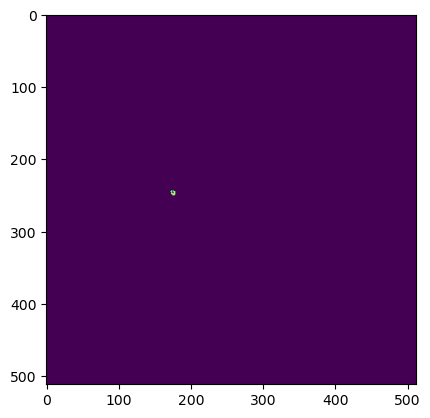

In [34]:
plt.imshow(generated_mask[100])

In [35]:
import matplotlib.pyplot as plt

def plot_images(images, rows=8, cols=8, figsize=(10, 10)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')
        ax.set_aspect('auto')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(i < cols)
        ax.spines['right'].set_visible(i < cols)
        ax.spines['bottom'].set_visible(i >= cols * (rows - 1))
        ax.spines['left'].set_visible(i % cols == 0)
    plt.tight_layout()
    plt.show()


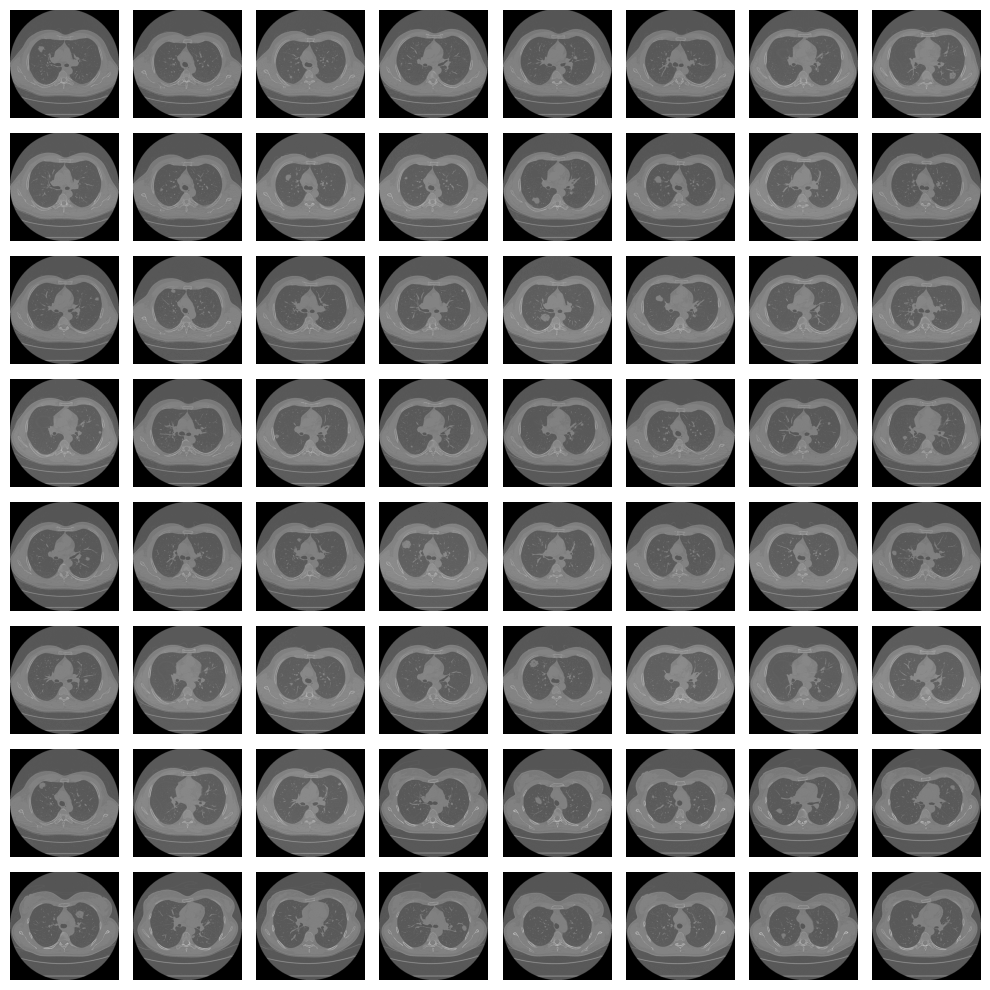

In [36]:
# Generated
plot_images(df_combined['ct_image'].values, rows=8, cols=8)

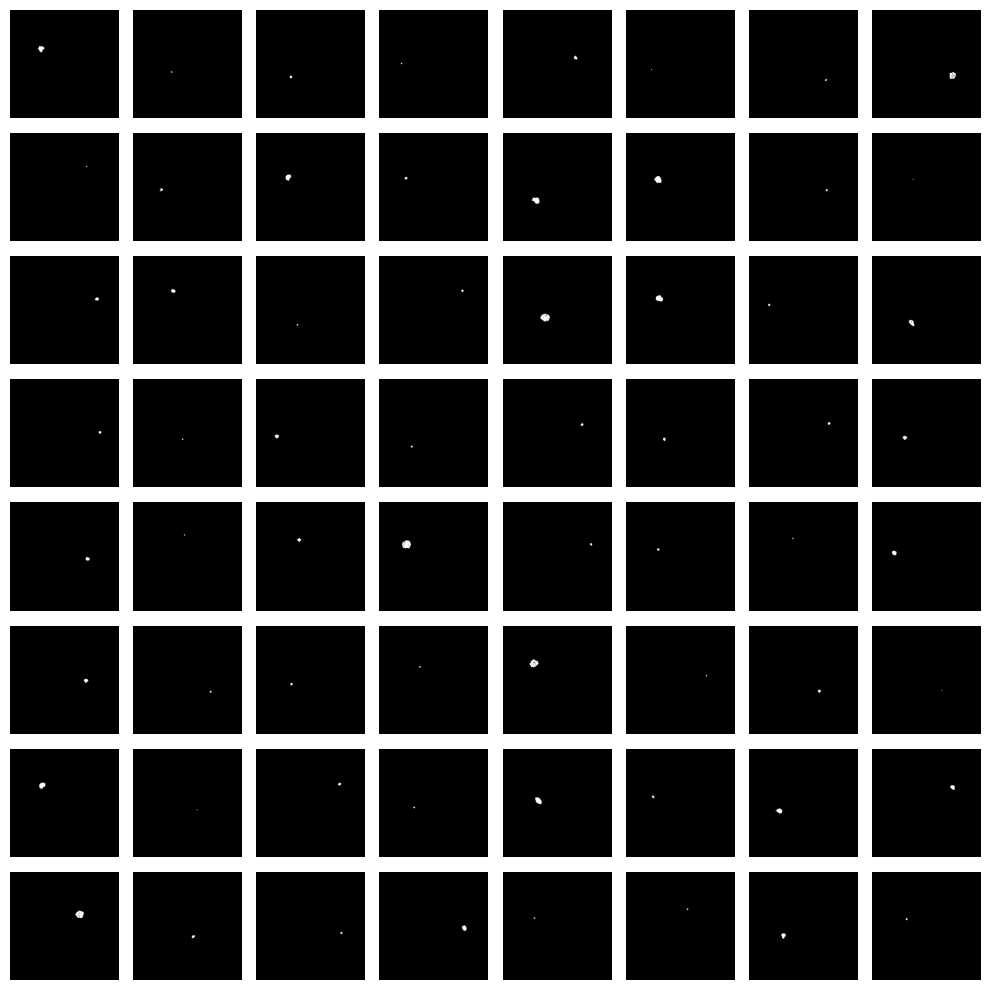

In [37]:
# Generated
plot_images(df_combined['cancer_mask'].values, rows=8, cols=8)

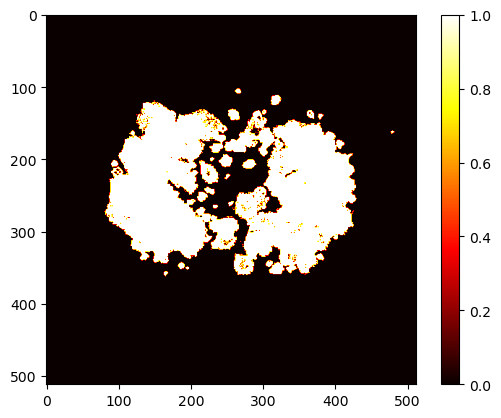

In [38]:
import numpy as np

# Sum the matrices column-wise
summed_matrix = np.sum(df_combined['cancer_mask'], axis=0)

# Visualize the summed matrix
plt.imshow(summed_matrix, cmap='hot')
plt.colorbar()
plt.show()


In [39]:
df_combined['cancer_mask']

0      [[False, False, False, False, False, False, Fa...
1      [[False, False, False, False, False, False, Fa...
2      [[False, False, False, False, False, False, Fa...
3      [[False, False, False, False, False, False, Fa...
4      [[False, False, False, False, False, False, Fa...
                             ...                        
708    [[False, False, False, False, False, False, Fa...
709    [[False, False, False, False, False, False, Fa...
710    [[False, False, False, False, False, False, Fa...
711    [[False, False, False, False, False, False, Fa...
712    [[False, False, False, False, False, False, Fa...
Name: cancer_mask, Length: 713, dtype: object

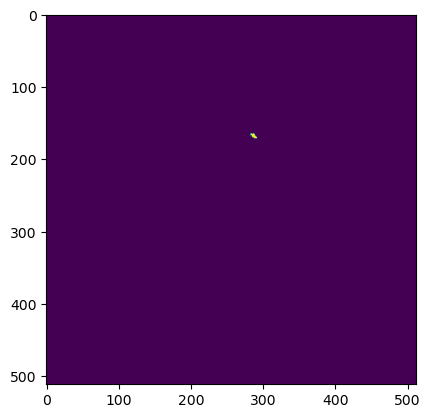

In [40]:
plt.imshow(df_combined['cancer_mask'][660])

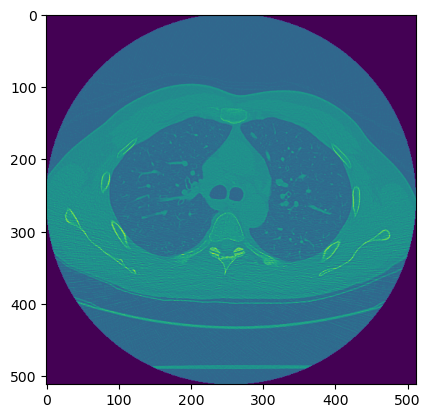

In [41]:
plt.imshow(df_combined['ct_image'][660])